# Inadequacies in Ghana Health
The analysis below details the challenges faced by the Ghana Health and its impact on the citizens in the
country.

## The project dependencies:
In order to make this project reproducible, kindly pip install the following:
* Python
* pandas, numpy
* matplotlib

### Importing required packages

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Reading in the two datasets to work with
We read in the dataset and have a look at a few rows using the
.head() method

In [30]:
health_facilities = pd.read_csv('.\ghana_health\GhanaHealth-master\health-facilities-gh.csv')
health_tiers = pd.read_csv('.\ghana_health\GhanaHealth-master\health-facility-tiers.csv')

In [31]:
health_facilities.head()

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098


In [32]:
health_tiers.head()

,Region,Facility,Tier
0,Ashanti,PEACE AND LOVE HOSPITAL,2
1,Ashanti,TODAH HOSPITAL,2
2,Ashanti,ASOKWA CHILREN'S HOSPITAL,2
3,Ashanti,FANKYEBEBRA HOSPITAL,2
4,Ashanti,MICHMIT HOSPITAL,2


As it can be seen, the two datasets have different columns. But then doing analysis on them
differently will only give a **half-truth** about the data. So we have to find a way to merge the two datasets and perform
thorough analysis on the complete dataset to get the full picture.
* We begin by creating a Tier column in the first dataset
<br>Note that Tier 1 is defined as a Teaching hospital and Regional hospitals with 5,000 Patients/month
<br>Tier 2 is defined as District hospitals & Large volume hospitals with 3000 Patients/month
<br>Tier 3 is defined as small clinics and maternity home with <1000 Patients/month

We create a helper function that will scan through the first dataset
<br>and assign respective Tiers to where found applicable
<br> eg: Assign Tier=1 when you find a facility that contains Teaching or Regional Hospital

In [33]:
def conversion(x):
    if ("Teaching" in x)  or ("Regional" in x):
        return 1
    elif ('Maternity' in x) or ('Clinic' in x):
        return 3
    else:
        return 2

In [34]:
#Creating Tiers column and applying the helper function we wrote on the series with column name FacilityName
health_facilities['Tier'] = health_facilities['FacilityName'].apply(conversion)

We now maintain columns that are important to us in order to merge with the second data. 
<br> As our goal of the analysis is to find the inadequacies of the Ghana Health 

In [35]:
health_facilities = health_facilities[['Region','FacilityName','Tier']]

In [36]:
health_facilities.columns = ['Region','Facility','Tier']

In [37]:
health_facilities.head()

,Region,Facility,Tier
0,Ashanti,A.M.E Zion Clinic,3
1,Ashanti,Abenkyiman Clinic,3
2,Ashanti,Aboabo Health Centre,2
3,Ashanti,Aboabogya Health Centre,2
4,Ashanti,Aboaso Health Centre,2


## Datasets Merged

In [38]:
merged_data = health_facilities.append(health_tiers, ignore_index=True)

Performing statistics on the merged data shows Accra with the most health facilities
<br> With Upper West trailing the list

In [39]:
pd.value_counts(merged_data['Region'])

Greater Accra    1037
Ashanti           975
Western           648
Eastern           484
Brong Ahafo       455
Volta             453
Central           399
Northern          311
Upper East        272
Upper West        197
Name: Region, dtype: int64

## Visualizing

Text(0.5,0,'Regions')

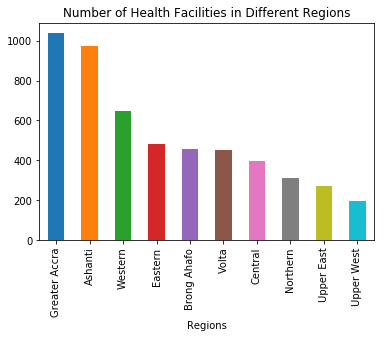

In [40]:
merged_data['Region'].value_counts().plot(kind='bar')
plt.title('Number of Health Facilities in Different Regions')
plt.xlabel('Regions')

## Delving More into the Health Care
We realize that only 19 Facilities can provide for 5,000 Patients/Month i.e Tier 1
<br> 2526 Facilities can provide for 3,000 Patients/Month i.e Tier 2
<br> 2686 Facilities can provide for <1,000 Patients/Month


In [41]:
pd.value_counts(merged_data['Tier'])

3    2686
2    2526
1      19
Name: Tier, dtype: int64

## Grouping the regions into respective tiers and visualizing them.

# Tier 3 by Regions

In [42]:
merged_data[merged_data['Tier']==3].groupby('Region')['Tier'].count()

Region
Ashanti          580
Brong Ahafo      271
Central          172
Eastern          198
Greater Accra    786
Northern          58
Upper East        86
Upper West        45
Volta            136
Western          354
Name: Tier, dtype: int64

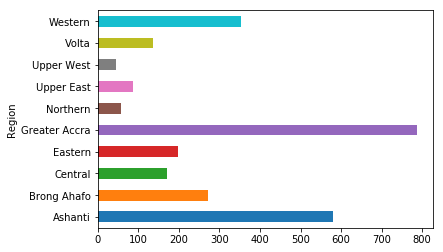

In [43]:
merged_data[merged_data['Tier']==3].groupby('Region')['Tier'].count().plot(kind='barh')

# Tier 2 by Regions

In [44]:
merged_data[merged_data['Tier']==2].groupby('Region')['Tier'].count()

Region
Ashanti          394
Brong Ahafo      182
Central          225
Eastern          284
Greater Accra    248
Northern         251
Upper East       184
Upper West       150
Volta            316
Western          292
Name: Tier, dtype: int64

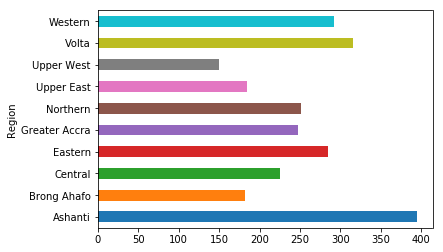

In [23]:
merged_data[merged_data['Tier']==2].groupby('Region')['Tier'].count().plot(kind='barh')

## Analyzing why Greater Accra region has most health facilities

Data showcases that Accra has 3 Facilities that can provide for 5,000 Patients/Month i.e Tier 1
<br> 248 Facilities can provide for 3,000 Patients/Month
<br> 786 Facilities can provide for <1,000 Patients/Month

In [169]:
accra_data = merged_data[merged_data['Region']=="Greater Accra"]

In [170]:
accra_data.head()

,Region,Facility,Tier
1698,Greater Accra,Arakan Maternity Home,3
1699,Greater Accra,Arakan Medical Centre,2
1700,Greater Accra,1st Foundation Clinic,3
1701,Greater Accra,37 Military Hospital,2
1702,Greater Accra,441 Welfare Association Clinic,3


In [181]:
accra_data['Tier'].value_counts()

3    786
2    248
1      3
Name: Tier, dtype: int64

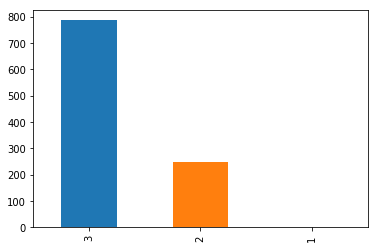

In [184]:
accra_data['Tier'].value_counts().plot(kind='bar')

## Analyzing why Upper West Region has least health facilities

In [24]:
UW_data = merged_data[merged_data['Region']=="Upper West"]

In [25]:
UW_data.head()

,Region,Facility,Tier
2701,Upper West,Billaw Health Centre,2
2702,Upper West,Duori Health Centre,2
2703,Upper West,Hain Health Centre,2
2704,Upper West,Hamile Health Centre,2
2705,Upper West,Kanyiri Maternity Home,3


In [26]:
UW_data['Tier'].value_counts()

2    150
3     45
1      2
Name: Tier, dtype: int64

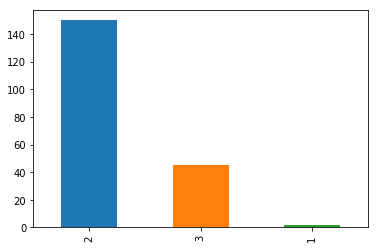

In [27]:
UW_data['Tier'].value_counts().plot(kind='bar')

# Conclusion

From the above analysis we've been able to highlight inadequacies in the Ghana Health
<br> using Data from different sources. From the data we can clearly see that we lack
<br> health facilities in the Northern Regions of Ghana. As the sum of the total facilities of
<br> the Northern Regions is half the total number of facilities in Greater Accra
<br> Also we have uncovered that facilities that can provide for 5,000 Patients/Month
<br> is woefully low looking at the increasing population of Ghana.

### Additional readings
* https://www.graphic.com.gh/news/general-news/northen-region-records-increasing-population-growth.html
* worldpopulationreview.com/countries/ghana-population/